In [17]:
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')
from BatchLab import BatchLab
import numpy as np
%matplotlib inline

In [18]:
tend = 0.05
dt = 0.0001
phi=0.5

In [19]:
bl = BatchLab(tend, dt)

In [20]:
C_init=0.0001/3
bl.add_species(element='H2CO3', init_C=0)
bl.add_species(element='HCO3', init_C=0)
bl.add_species(element='CO3', init_C=0)

bl.add_acid(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])

bl.add_species(element='Ca', init_C=0)
bl.add_species(element='CaCO3', init_C=0)


bl.add_ion(element='Ca', charge=2)

In [21]:
bl.constants['Ks_CaCO3'] = 3.3e-9
bl.constants['k_pre'] = 1e-2
bl.constants['k_dis'] = 1e-1

In [22]:
bl.rates['R_pre_CaCO3'] = 'k_pre * (Ca*CO3/Ks_CaCO3-1)'
bl.rates['R_dis_CaCO3'] = 'k_dis * CaCO3 * (1 - Ca*CO3/Ks_CaCO3)'

In [23]:
bl.dcdt['CaCO3'] = 'R_pre_CaCO3 - R_dis_CaCO3'
bl.dcdt['Ca'] = '-R_pre_CaCO3 + R_dis_CaCO3  +1e-2'
bl.dcdt['CO3'] = '-R_pre_CaCO3 + R_dis_CaCO3 +1e-2'

In [24]:
bl.solve()

Simulation started:
	 2017-09-13 20:26:31


Estimated time of the code execution:
	 0h:00m:02s
Will finish approx.:
	 2017-09-13 20:26:34


/Users/MarkelovIgor/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


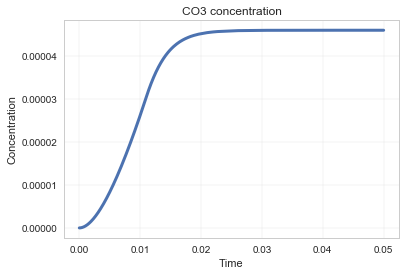

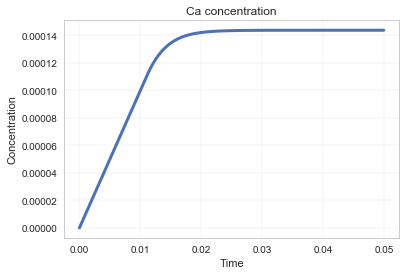

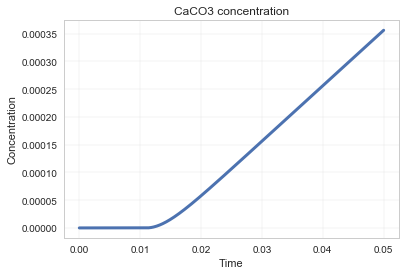

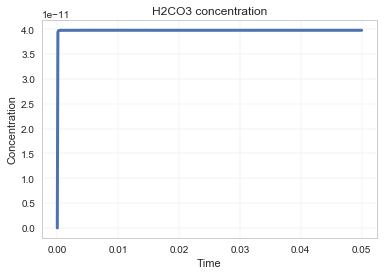

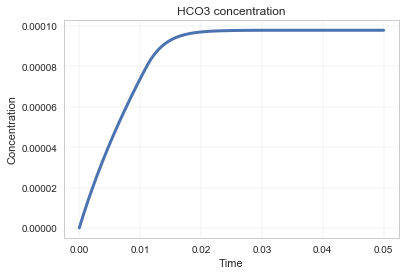

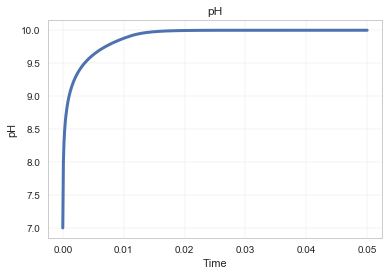

In [25]:
bl.plot_profiles()

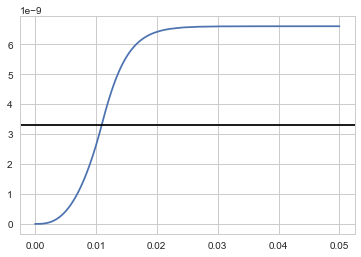

In [26]:
plt.plot(bl.time, bl.CO3['concentration'][0]*bl.Ca['concentration'][0])
plt.axhline(bl.constants['Ks_CaCO3'], c='k')

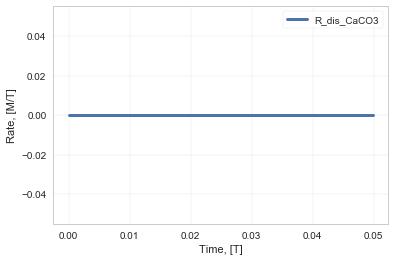

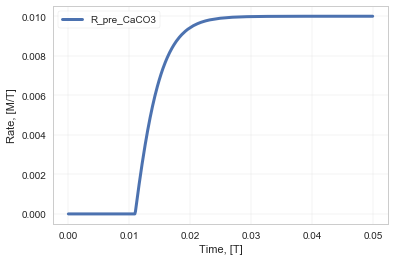

In [27]:
bl.plot_rates()